# Trabalho 1
### Matheus Araujo Pinheiro
### Julia Graziosi Ortiz

### Solução analítica
#### A solução analítica fornecida é: $$ u(x, y) = e^{-y} \sin(2\pi x) $$

In [1]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Parametros da Solucao aproximada
h = 0.05
c = (4 * np.pi**2 - 3)

##### Passo 1: Definindo funcoes auxiliares

In [3]:
# Toma k em funcao dos indices i, j
def indice(i, j, n): return i + n * j

def neumann(x): return np.exp(1) * np.sin( 2 * np.pi * x)

def exata(x, y): return np.exp(-y) * np.sin(2 * np.pi * x)

##### Passo 2: Montando e resolvendo o sistema

In [4]:
def resolve(h):
    # Quantidade de incógnitas
    n = int(1 / h) + 1    # Pontos internos em x
    m = int(2 / h) + 1    # Pontos totais em y
    N = n * m             # Número total de incógnitas

    # Matrizes A e b
    A = np.zeros((N, N))
    b = np.zeros(N)
    
    # Dominio dos pontos
    x = np.linspace(0, 1, n)  # Pontos internos em x
    y = np.linspace(-1, 1, m)
    
    F = neumann(x)

    # Ajuste na discretização para as condições de contorno
    for j in range(0, m):
        for i in range(0, n):
            k = indice(i, j, n)  # indice linear

            # Condição de contorno em x = 0 (Dirichlet)
            if i == 0:
                A[k][k] = 1
                b[k] = 0
                continue

            # Condição de contorno em x = 1 (Dirichlet)
            if i == n - 1:
                A[k][k] = 1
                b[k] = 0
                continue

            if j == 0:
                A[k][k] = 3
                A[k][k + n] = -4 
                A[k][k + (2 * n)] = 1
                b[k] = 2 * h * F[k]

            # pontos com Cond. Robin
            elif j == m - 1:
                A[k][k - (2 * n)] = 1 
                A[k][k - n] = -4
                A[k][k] = (3 + 2 * h )

            # Pontos internos
            else:
                A[k][k - n] = 3 + (c * h) / 2
                if i != 1:
                      A[k][k - 1] = 1
                A[k][k] = - 8 
                if i != n:
                      A[k][k + 1] = 1
                A[k][k + n] = 3 - (c * h) / 2
                
    U = np.linalg.solve(A, b)
    U = U.reshape((m, n))
    return U, n, m, x, y


##### Passo 3: Resolver o sistema AU = b

In [5]:
# Solucao do sistema e das informacoes necessarias
U, n, m, x, y = resolve(h)

# Malha
X, Y = np.meshgrid(x, y)

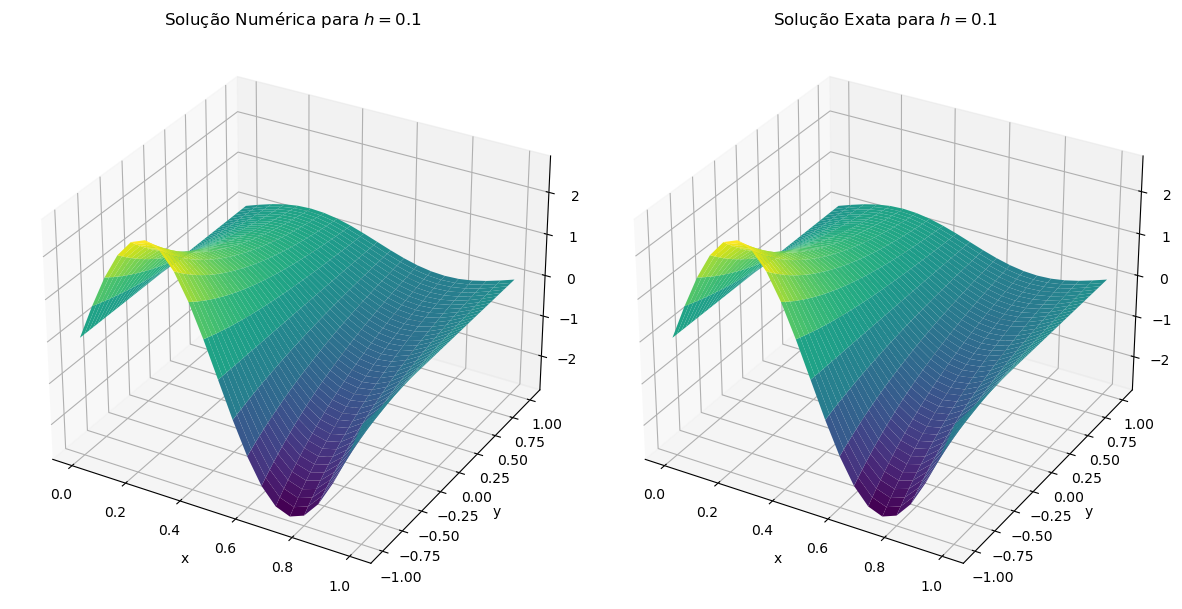

In [6]:
# Calculo da solucao exata
u = exata(X, Y)

# Grafico da solucao aproximada vs solucao exata
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1,2,1, projection='3d')
ax1.plot_surface(X, Y, U, cmap='viridis')
ax1.set_title('Solução Numérica para $h = 0.1$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

#ax1.set_zlabel('U')
ax2 = fig.add_subplot(1,2,2, projection='3d')
ax2.plot_surface(X, Y, u, cmap='viridis')
ax2.set_title('Solução Exata para $h = 0.1$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
#ax2.set_zlabel('u')

plt.tight_layout()
plt.show()

### Calculo dos erros e Estudo de Convergencia

##### Erros absolutos locais

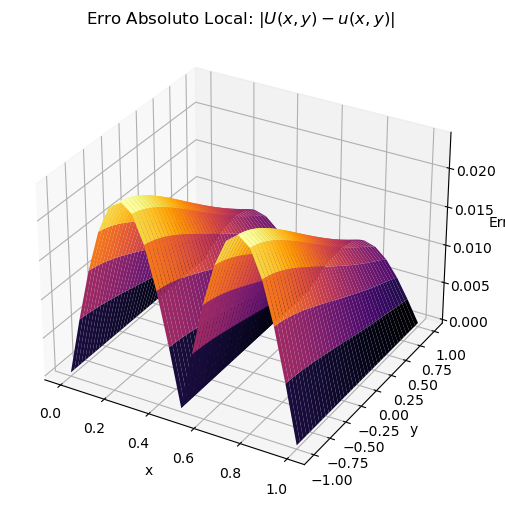

In [7]:
# Erro
erro_local = np.abs(U - u)

# Grafico 3D do erro absoluto local
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, erro_local, cmap='inferno')
ax.set_title('Erro Absoluto Local: $|U(x, y) - u(x, y)|$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Erro')
plt.show()

##### Estudo de Convergencia numerica

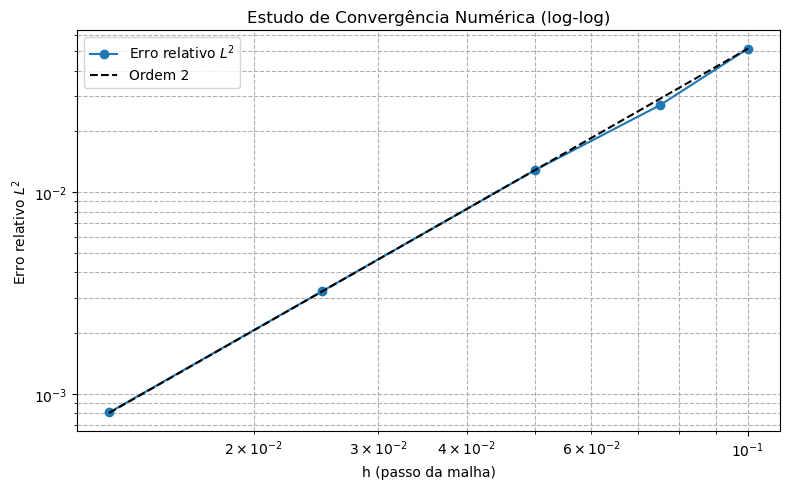

Ordem de convergência estimada: 1.9821


In [8]:
# Lista de passos h
h_list = [0.0125, 0.025, 0.05, 0.075, 0.1]
erros_L2 = []

# Loop pelas malhas
for h in h_list:
    U, n, m, x, y = resolve(h)

    # Malha para comparacao com a solucao exata
    X, Y = np.meshgrid(x, y)
    u = exata(X, Y)

    # Erro relativo L2
    erro_rel = np.linalg.norm(U - u, ord='fro') / np.linalg.norm(u, ord='fro')
    erros_L2.append(erro_rel)

# Grafico log-log da analise de convergencia
plt.figure(figsize=(8, 5))
plt.loglog(h_list, erros_L2, 'o-', base=10, label='Erro relativo $L^2$')

# Reta de referencia com ordem 2
ref_h = h_list[-1]
ref_erro = erros_L2[-1]
ref_line = [ref_erro * (hi / ref_h)**2 for hi in h_list]
plt.loglog(h_list, ref_line, 'k--', label='Ordem 2')

plt.xlabel('h (passo da malha)')
plt.ylabel('Erro relativo $L^2$')
plt.title('Estudo de Convergência Numérica (log-log)')
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()

# Calculo da ordem de convergência
ordem = np.polyfit(np.log(h_list), np.log(erros_L2), 1)[0]
print(f"Ordem de convergência estimada: {ordem:.4f}")
